# 프로젝트 개요
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

# 목표 설정
- 이번 데이터 분석의 최종적인 목표는 '구독을 연장할 확률이 높은 유저들이 가지는 특징을 찾는다.' 입니다.
- 이를 위해 여러가지 가설을 설정하고 데이터 분석을 시도해보려고 합니다.

# 탐색적 데이터 분석 단계

- 가설을 설정하기 전에 데이터를 여러 방식으로 살펴보려고 합니다.
- 구독 연장과 직접적으로 연관이 있는 데이터는 target인 것으로 보입니다.
- target 데이터와 다른 데이터 간의 상관 관계를 분석한다면 구독 연장하는 유저의 특징을 파악하는데 있어서 좋은 아이디어를 얻을 수 있을거라 생각했습니다.

## 상관 관계 분석

- target 데이터와 다른 데이터 간의 상관 관계 분석을 통해 구독 연장과 관련있는 변수가 무엇인지 확인해보려 합니다.

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc 
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
plt.rcParams['axes.unicode_minus'] = False

In [89]:
# 데이터 가져오기
df = pd.read_csv('C:\workspace\python\WASSUP\mini.csv', encoding= 'cp949')

### 데이터 정제
- 중복 데이터 제거
- user_id 열을 index로 지정
- 열의 이름을 한글로 변경
- 실수화 할 수 있는 범주형 데이터를 찾아 실수화 (추후 분석을 위해)

In [90]:
#중복 데이터 갯수 확인
df.duplicated().sum()

0

In [91]:
#user_id 열을 index로 지정
df = df.set_index('user_id')

In [139]:
#열의 이름을 한글로 변경
columns = ['서비스 가입 기간(월)', '최근 로그인 시간(일)', '평균 접속 시간(분)', '세션당 평균 학습 시간(분)', '활동적인 학습 일수', '완료 코스 개수', '최근 학습성취도', '중단된 학습 세션 수', '커뮤니티 참여도', '선호 학습 난도', '구독 유형', '고객 문의 이력', '3개월 간 결제패턴', '구독 연장 여부']

df.columns = columns

In [140]:
#범주형 데이터 실수화
difficulty_level = {'Low': 0, 'Medium': 1, 'High': 2}
df['선호 학습 난도'] = df['선호 학습 난도'].map(difficulty_level)
#subcription_type 변수는 실수화하기 어려워서 남겨둠

### 상관 관계 분석 결과 확인

In [141]:
#범주형 데이터를 제외한 열만 남기기.
data = df.drop('구독 유형', axis=1)
#상관 관계 계산 함수 실행
correlation_matrix = data.corr()

In [142]:
#target 행은 필요 없어서 제외 시키기
correlation_matrix = correlation_matrix.drop('구독 연장 여부',axis=0)
#시각화를 위해 target 열에 있는 데이터만 가져오고 상관 계수 값의 크기에 따라서 정렬하기
target_correlations = correlation_matrix['구독 연장 여부'].sort_values(ascending=False)

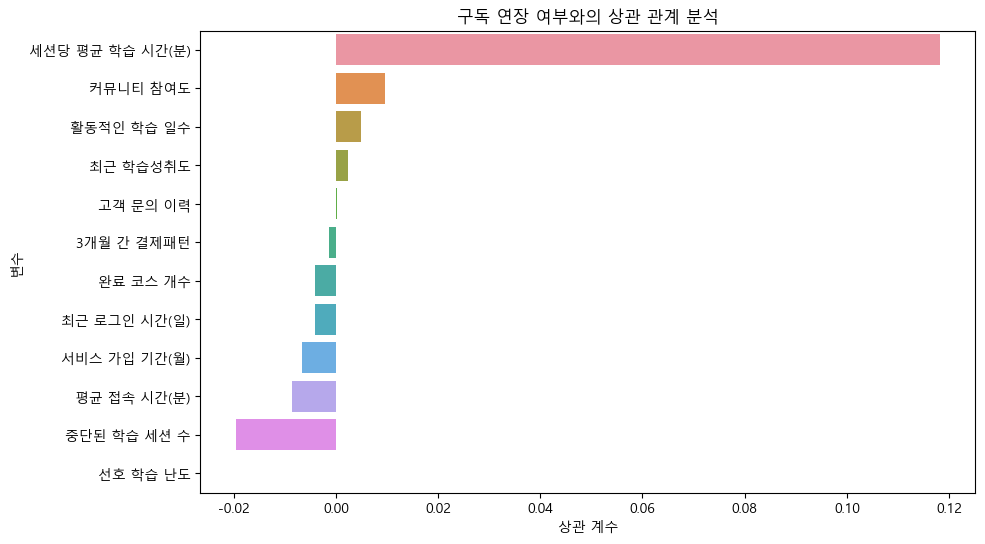

In [143]:
#시각화 하기
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.values, y=target_correlations.index)
#plt.xticks(rotation=90)
plt.title('구독 연장 여부와의 상관 관계 분석')
plt.ylabel('변수')
plt.xlabel('상관 계수')
plt.show()

- 상관 관계 분석 결과, 세션당 평균 학습 시간 변수와 구독 연장 여부 변수 사이에 아주 약한 양의 상관 관계(상관 계수 0.118)가 있는 것으로 확인됩니다.
- 그러나 상관 계수가 매우 낮기 때문에, 이 관계는 뚜렷하지 않습니다.
- 가설을 세우지 않은 탐색적 데이터 분석 결과, 세션당 평균 학습 시간 변수와 구독 연장 여부 사이에 약한 상관 관계가 있음을 알 수 있었습니다.
- 아직 구독 연장 여부와의 관계를 검증하지 않은 열이 존재합니다. 추가적으로 구독 유형과 구독 연장 여부 사이의 관계가 있는지 확인해보도록 하겠습니다.

## 구독 연장과 구독 유형 사이에는 특별한 관계가 있을까?

> 가설 : 프리미엄 구독자는 베이직 구독자보다 구독 연장을 희망하는 인원의 비율이 더 높을 것이다.


### 비율 비교하기

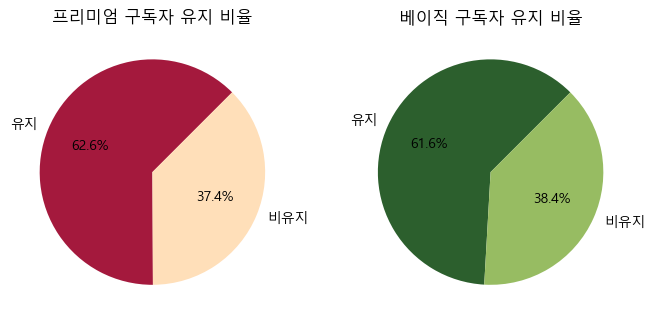

In [144]:
premium_retention = df[df['구독 유형'] == 'Premium']['구독 연장 여부'].value_counts()
basic_retention = df[df['구독 유형'] == 'Basic']['구독 연장 여부'].value_counts()

# 파이 차트 데이터 준비
premium_user = [premium_retention[1], premium_retention[0]]  # 유지된 사용자, 유지되지 않은 사용자
basic_user = [basic_retention[1], basic_retention[0]]  # 유지된 사용자, 유지되지 않은 사용자

# 파이 차트 생성
fig, ax = plt.subplots(1, 2, figsize=(8, 7))

# 프리미엄 구독자 파이 차트
ax[0].pie(premium_data, labels=['유지', '비유지'], autopct='%1.1f%%', startangle=45, colors=['#A4193D','#FFDFB9'])
ax[0].set_title('프리미엄 구독자 유지 비율')

# 베이직 구독자 파이 차트
ax[1].pie(basic_data, labels=['유지', '비유지'], autopct='%1.1f%%', startangle=45, colors=["#2C5F2D","#97BC62"])
ax[1].set_title('베이직 구독자 유지 비율')

plt.show()

- 프리미엄 구독자의 구독 유지 비율이 베이직 구독자의 구독 유지 비율에 비해 1%p 가량 높은 것을 확인할 수 있습니다.
- 이것이 과연 유의미한 차이인지 확인하기 위해서 카이제곱 검정을 수행해보겠습니다.

In [145]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['구독 유형'], df['구독 연장 여부'])
contingency_table

구독 연장 여부,0,1
구독 유형,,
Basic,2296,3683
Premium,1505,2516


In [115]:
result = chi2_contingency(contingency_table)
result.pvalue

0.3363503107808859

- p-값이 약 0.336으로, 일반적으로 사용되는 유의 수준 0.05보다 큽니다. 이는 두 그룹 간의 차이가 통계적으로 유의미하지 않다는 것을 의미합니다.
- 그러므로 프리미엄 구독자 중 구독 연장을 희망하는 비율이 베이직 구독자보다 유의미하게 높다고 주장하기 어렵습니다. 두 그룹 간의 차이는 통계적으로 유의미하지 않으며, 비율 차이도 크지 않습니다.

- 변수 간의 상관 관계 분석을 통해 의미있는 인사이트를 도출하기는 어려운 것으로 보입니다.
- 그러면 방향을 바꾸어 추가 분석을 진행해보겠습니다.